<a href="https://colab.research.google.com/github/dbonekamp/imageProcessingAndR/blob/main/rpython_tutorial_241113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [27]:
%%R
library(tidyverse)

In [28]:
%%R
nsamples = 30
samples = paste0("sample_", 1:nsamples)
samples


 [1] "sample_1"  "sample_2"  "sample_3"  "sample_4"  "sample_5"  "sample_6" 
 [7] "sample_7"  "sample_8"  "sample_9"  "sample_10" "sample_11" "sample_12"
[13] "sample_13" "sample_14" "sample_15" "sample_16" "sample_17" "sample_18"
[19] "sample_19" "sample_20" "sample_21" "sample_22" "sample_23" "sample_24"
[25] "sample_25" "sample_26" "sample_27" "sample_28" "sample_29" "sample_30"


In [29]:
import pandas as pd
import numpy as np

nsamples = 100

samples = ['PAT_' + str(i) for i in range(1, nsamples+1)]

df = pd.DataFrame({'pseudonym': samples})



df.head()

,pseudonym
0,PAT_1
1,PAT_2
2,PAT_3
3,PAT_4
4,PAT_5


In [49]:
# prompt: DataFrame „df“ wird verwendet: add a column with two values "benign" and "malignant" such that 50% of the dataset has either value

# Import the numpy library for random number generation
import numpy as np

# Calculate the number of rows for each value
num_rows = len(df)
num_benign = num_rows // 2
num_malignant = num_rows - num_benign

# Create a list of labels, with 50% "benign" and 50% "malignant"
labels = ['benign'] * num_benign + ['malignant'] * num_malignant

# Shuffle the labels randomly
np.random.shuffle(labels)

# Add the labels as a new column to the dataframe
df['label'] = labels

df.head()

,pseudonym,label,parameter_0,parameter_1,parameter_2,parameter_3,parameter_4,parameter_5
0,PAT_1,benign,30.073018,76.790200,75.660829,284.246640,35.366504,313.526301
1,PAT_2,malignant,16.891762,98.257481,79.062018,317.163032,33.906960,199.154681
2,PAT_3,malignant,27.168348,86.429903,69.407572,299.622010,40.618334,296.199454
3,PAT_4,malignant,23.823438,75.787663,72.490725,318.343096,41.231757,281.325386
4,PAT_5,malignant,27.622221,86.046076,69.935810,324.984177,34.472481,203.446197


In [31]:
effect = [l == "malignant" for l in labels]
np.array(effect)*100

array([100, 100, 100, 100, 100, 100, 100,   0, 100, 100, 100,   0, 100,
         0, 100,   0, 100,   0, 100,   0,   0,   0, 100, 100, 100,   0,
       100,   0,   0, 100,   0,   0,   0, 100, 100,   0, 100,   0,   0,
         0, 100, 100, 100, 100,   0,   0, 100,   0,   0, 100, 100,   0,
       100, 100,   0,   0, 100, 100,   0,   0, 100,   0,   0,   0, 100,
       100, 100, 100, 100,   0,   0,   0, 100,   0, 100,   0, 100,   0,
         0,   0, 100,   0, 100,   0, 100,   0,   0, 100,   0,   0, 100,
       100,   0, 100,   0,   0,   0, 100,   0,   0])

In [32]:
# Add a new column with a Gaussian distribution
parameters = [
    #[direction, mean, std, effectsize]
     [1,  23,  3,  3],
     [-1, 90, 10,  3],
     [1,  73,  3,  0.2],
     [-1, 314, 14,  2],
     [1,  37,  7,  3],
     [-1, 245, 45,  3],
]

for i,p in enumerate(parameters):
  direction = p[0]
  mean = p[1]
  std = p[2]
  effectsize = p[3]
  df[f'parameter_{i}'] = direction * np.array(effect)* effectsize + np.random.normal(loc=0, scale=std, size=len(df)) + mean
df.head()

,pseudonym,label,parameter_0,parameter_1,parameter_2,parameter_3,parameter_4,parameter_5
0,PAT_1,malignant,30.073018,76.790200,75.660829,284.246640,35.366504,313.526301
1,PAT_2,malignant,16.891762,98.257481,79.062018,317.163032,33.906960,199.154681
2,PAT_3,malignant,27.168348,86.429903,69.407572,299.622010,40.618334,296.199454
3,PAT_4,malignant,23.823438,75.787663,72.490725,318.343096,41.231757,281.325386
4,PAT_5,malignant,27.622221,86.046076,69.935810,324.984177,34.472481,203.446197


In [33]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# ... (your existing code to create and modify the DataFrame 'df') ...

!mkdir -p data
df.to_csv('data/df.csv', index=False)



In [34]:
%%R
# prompt: load the df from the data directory into r, generate R code

df <- read.csv("data/df.csv")

df = df %>%
  column_to_rownames(var = "pseudonym")

head(df)

          label parameter_0 parameter_1 parameter_2 parameter_3 parameter_4
PAT_1 malignant    30.07302    76.79020    75.66083    284.2466    35.36650
PAT_2 malignant    16.89176    98.25748    79.06202    317.1630    33.90696
PAT_3 malignant    27.16835    86.42990    69.40757    299.6220    40.61833
PAT_4 malignant    23.82344    75.78766    72.49073    318.3431    41.23176
PAT_5 malignant    27.62222    86.04608    69.93581    324.9842    34.47248
PAT_6 malignant    23.37364    84.51556    72.90607    352.6209    46.64910
      parameter_5
PAT_1    313.5263
PAT_2    199.1547
PAT_3    296.1995
PAT_4    281.3254
PAT_5    203.4462
PAT_6    255.2879


In [35]:
%%R
sapply(df,function(x) sum(is.na(x)))

df$label = as.factor(df$label)
is.factor(df$label)





[1] TRUE


In [36]:
%%R
contrasts(df$label)

          malignant
benign            0
malignant         1


In [37]:
%%R
train_fraction = 0.5
smp_size <- floor(train_fraction * nrow(df))
train_indices <- sample(seq_len(nrow(df)), size = smp_size)

train <- df[train_indices, ]
test <- df[-train_indices, ]

In [38]:
# prompt: r code: convert the column "pseudonym" to the row index



In [39]:
%%R
head(train)

           label parameter_0 parameter_1 parameter_2 parameter_3 parameter_4
PAT_95    benign    24.16137    88.63012    76.75044    311.6137    47.61102
PAT_99    benign    22.13038    85.73454    72.80813    343.4250    46.66395
PAT_52    benign    21.83552    93.88731    71.31693    313.7380    33.58288
PAT_81 malignant    23.61088    90.27834    75.95564    320.5297    45.69947
PAT_71    benign    22.19608    83.26689    72.24373    306.9365    38.10019
PAT_57 malignant    23.97379    89.60775    71.65866    312.0212    45.99577
       parameter_5
PAT_95    241.0825
PAT_99    205.6325
PAT_52    288.6566
PAT_81    232.3343
PAT_71    277.5314
PAT_57    231.2810


In [40]:
%%R
model <- glm(label ~.,family=binomial(link='logit'),data=train)

summary(model)



Call:
glm(formula = label ~ ., family = binomial(link = "logit"), data = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -2.195e+01  1.311e+01  -1.674   0.0942 . 
parameter_0  4.640e-01  1.692e-01   2.742   0.0061 **
parameter_1  7.425e-03  4.073e-02   0.182   0.8553   
parameter_2  9.163e-02  1.138e-01   0.805   0.4208   
parameter_3  1.690e-02  2.363e-02   0.715   0.4745   
parameter_4 -3.894e-02  6.060e-02  -0.643   0.5205   
parameter_5 -1.694e-04  6.953e-03  -0.024   0.9806   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 69.315  on 49  degrees of freedom
Residual deviance: 56.983  on 43  degrees of freedom
AIC: 70.983

Number of Fisher Scoring iterations: 4



In [41]:
%%R
anova(model, test="Chisq")


Analysis of Deviance Table

Model: binomial, link: logit

Response: label

Terms added sequentially (first to last)


            Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                           49     69.315              
parameter_0  1  10.9296        48     58.385 0.0009464 ***
parameter_1  1   0.1381        47     58.247 0.7102265    
parameter_2  1   0.4723        46     57.775 0.4919091    
parameter_3  1   0.3655        45     57.409 0.5454644    
parameter_4  1   0.4257        44     56.984 0.5141093    
parameter_5  1   0.0006        43     56.983 0.9805559    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [42]:
%%R
head(subset(test,select=c(2:7)))

       parameter_0 parameter_1 parameter_2 parameter_3 parameter_4 parameter_5
PAT_4     23.82344    75.78766    72.49073    318.3431    41.23176    281.3254
PAT_5     27.62222    86.04608    69.93581    324.9842    34.47248    203.4462
PAT_7     25.01867    81.32368    70.26963    307.8703    39.88054    256.2762
PAT_8     22.99835    76.63471    72.76731    285.1041    40.15462    225.8201
PAT_9     27.91600    81.06799    71.33387    310.0939    42.59688    207.5327
PAT_14    25.01710    81.45121    76.55547    310.1244    40.77536    309.0722


In [43]:
%%R
fitted.results <- predict(model,newdata=subset(test,select=c(2:7)),type='response')
fitted.results <- ifelse(fitted.results > 0.5,1,0)

In [44]:
%%R
levels(test$label)

[1] "benign"    "malignant"


In [45]:
%%R
df2 = data.frame(predicted = as.factor(fitted.results))
df2$gt = test$label
levels(df2$predicted) = levels(df2$gt)
df2$correct = df2$predicted == df2$gt
df2$correct = as.factor(df2$correct)

misClasificError <- mean(df2$gt != df2$predicted)
print(paste('Accuracy',1-misClasificError))
head(df2)

[1] "Accuracy 0.66"
       predicted        gt correct
PAT_4  malignant malignant    TRUE
PAT_5  malignant malignant    TRUE
PAT_7  malignant malignant    TRUE
PAT_8     benign    benign    TRUE
PAT_9  malignant malignant    TRUE
PAT_14 malignant    benign   FALSE


In [46]:
if False:
  ! add-apt-repository -y ppa:cran/imagemagick
  ! apt-get update
  ! apt-get install -y libmagick++-dev
  ! R -e "install.packages('ROCR')"



[1] 0.7456


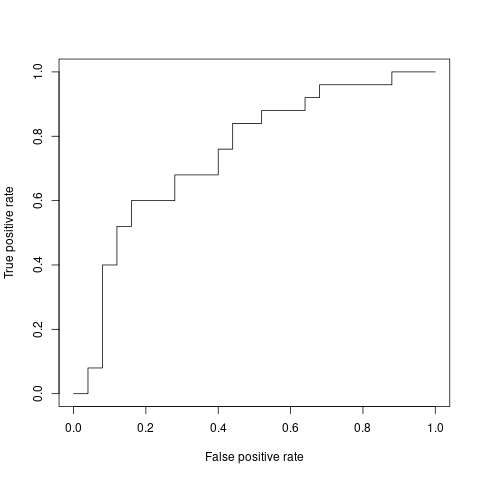

In [47]:
%%R
library(ROCR)
p <- predict(model,newdata=subset(test,select=c(2:7)),type='response')
pr <- prediction(p, test$label)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc